In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('database.csv',encoding='utf-8').set_index('縣市名稱')
data

,郵局間數,保險公司間數,郵局+保險公司間數,男性人口比例,女性人口比例,幼年人口比例,青壯年人口比例,老年人口比例,平均每人每年可支配所得(元),家庭收支-平均每戶全年經常性支出(元),家庭收支-平均每戶全年經常性收入(元),家庭收支-平均每戶可支配所得(元),家庭收支-平均每戶消費支出(元),每戶可支配所得中位數(元),投保率
縣市名稱,,,,,,,,,,,,,,,
新北市,164,308,472,0.485665,0.514335,0.109981,0.700127,0.189892,439673,1100999,1518312,1195910,856016,1067020,0.0491
台北市,154,714,868,0.471537,0.528463,0.121654,0.647720,0.230626,540380,1397485,1876218,1448219,1093880,1317854,0.0345
桃園市,94,235,329,0.492462,0.507538,0.134487,0.706672,0.158842,403802,1184835,1526617,1223521,917541,1085869,0.0433
台中市,116,484,600,0.488218,0.511782,0.130242,0.703972,0.165786,394704,1144982,1410055,1117013,915474,990747,0.0497
台南市,105,296,401,0.495850,0.504150,0.112248,0.691850,0.195903,345618,970123,1223299,971186,764141,821940,0.0634
高雄市,159,467,626,0.489572,0.510428,0.109920,0.690818,0.199262,392459,1115412,1401896,1091036,880662,908420,0.0676
宜蘭縣,36,74,110,0.501169,0.498831,0.111437,0.689062,0.199500,356193,928901,1152660,940349,754252,796895,0.0424
新竹縣,30,134,164,0.508952,0.491048,0.151298,0.703929,0.144773,474837,1485369,2000028,1429260,1068366,1196615,0.0399
苗栗縣,37,73,110,0.513882,0.486118,0.113324,0.691186,0.195491,369309,987554,1392027,1115312,761671,866742,0.0449


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

<Axes: >

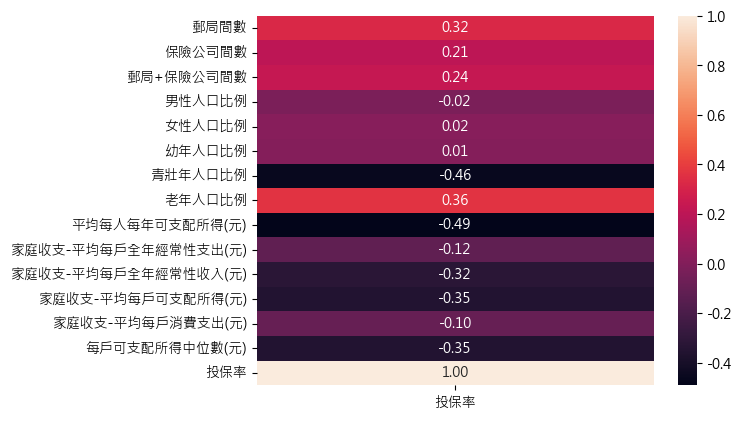

In [4]:
import seaborn as sns
import numpy as np
corr = data.corr()[['投保率']]
sns.heatmap(corr,annot=True,fmt='.2f')

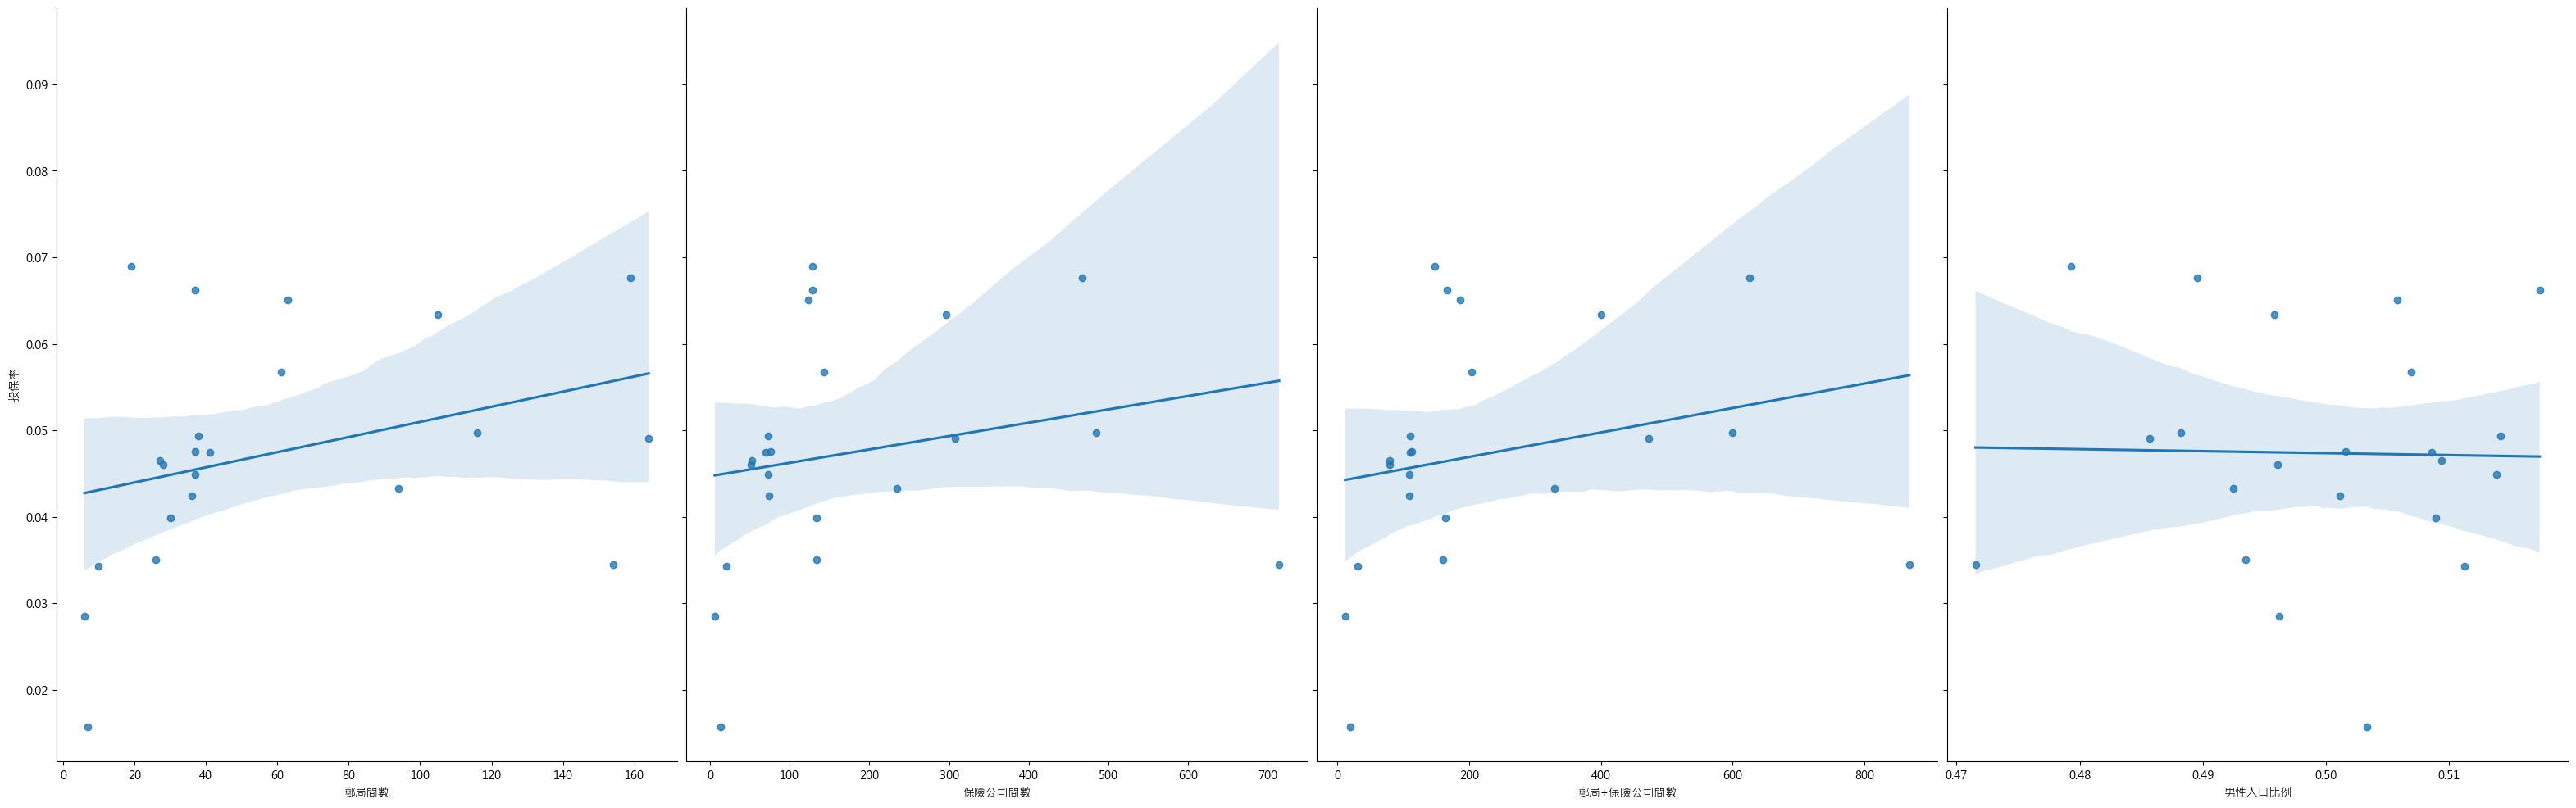

In [5]:
sns.pairplot(data, x_vars=data.columns[:4], y_vars=data.columns[-1], height=10, aspect=0.8, kind='reg') 
plt.show()

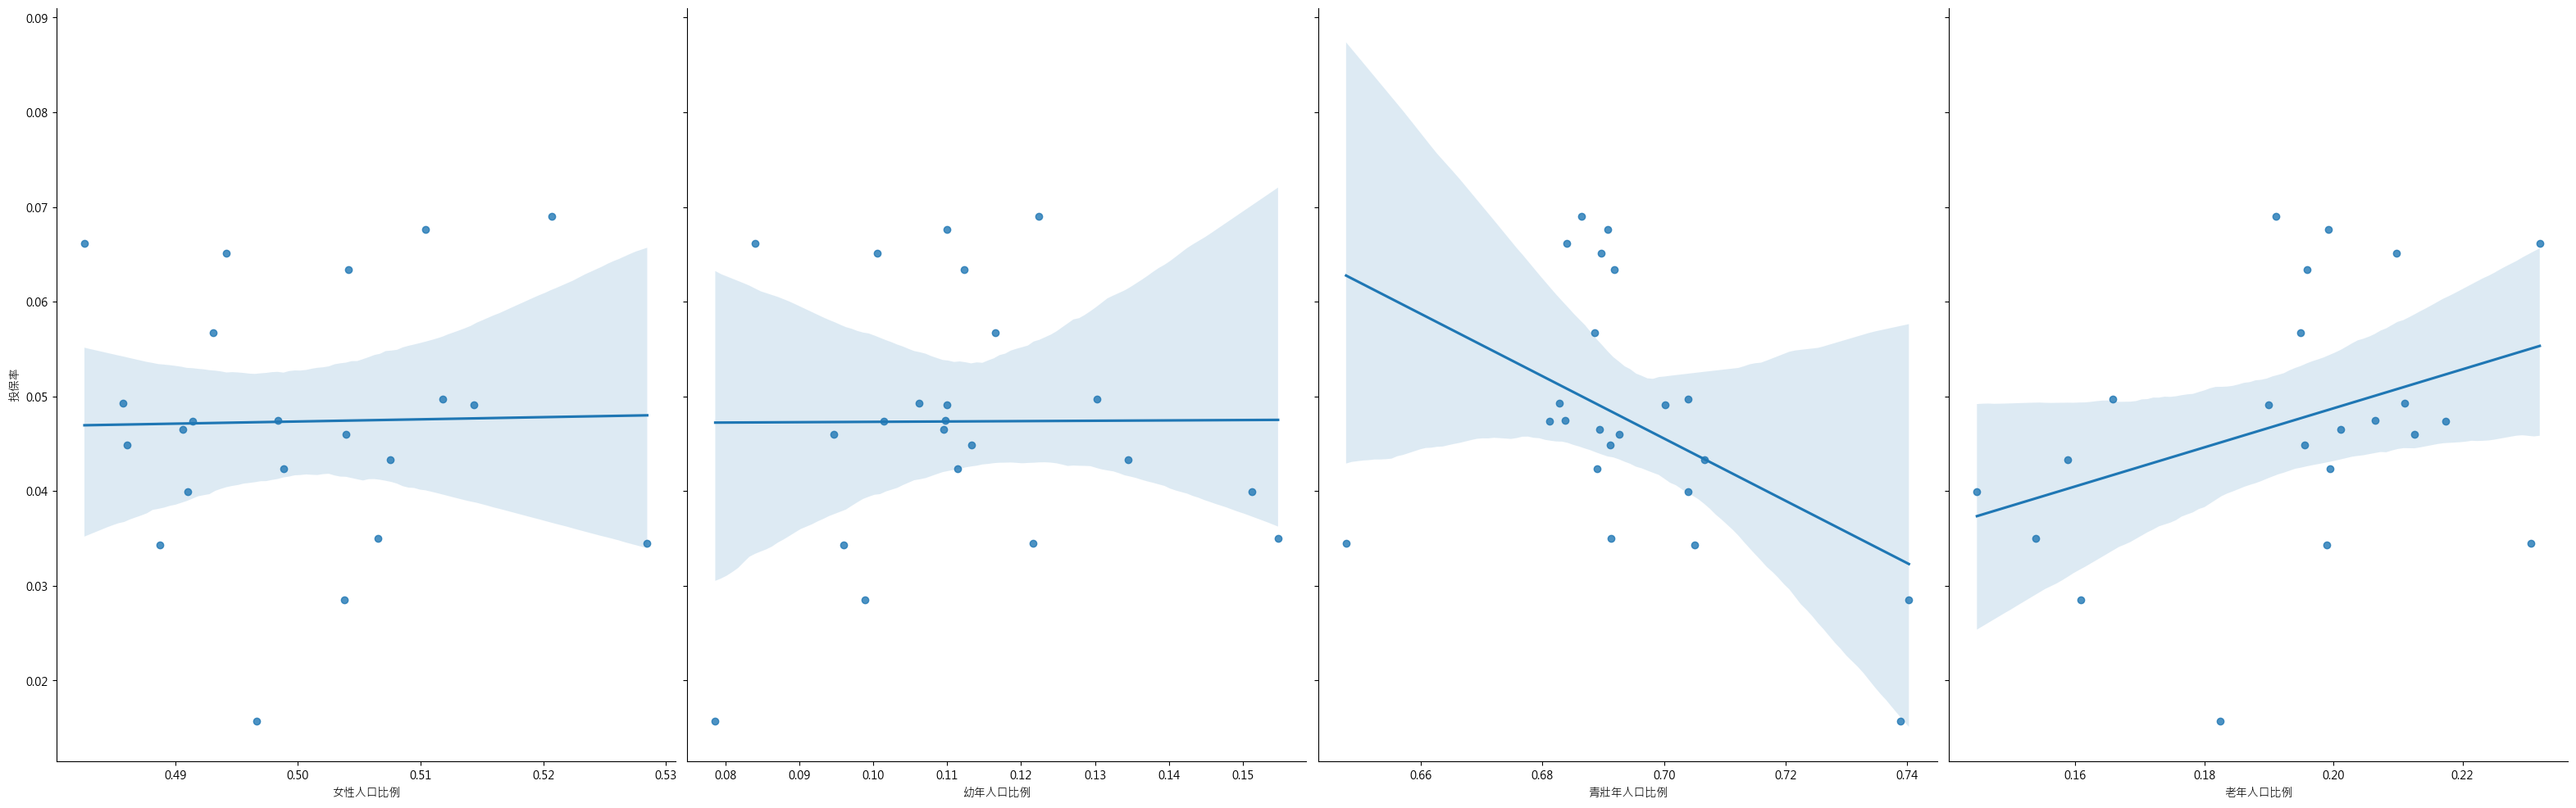

In [6]:
sns.pairplot(data, x_vars=data.columns[4:8], y_vars=data.columns[-1], height=10, aspect=0.8, kind='reg') 
plt.show()

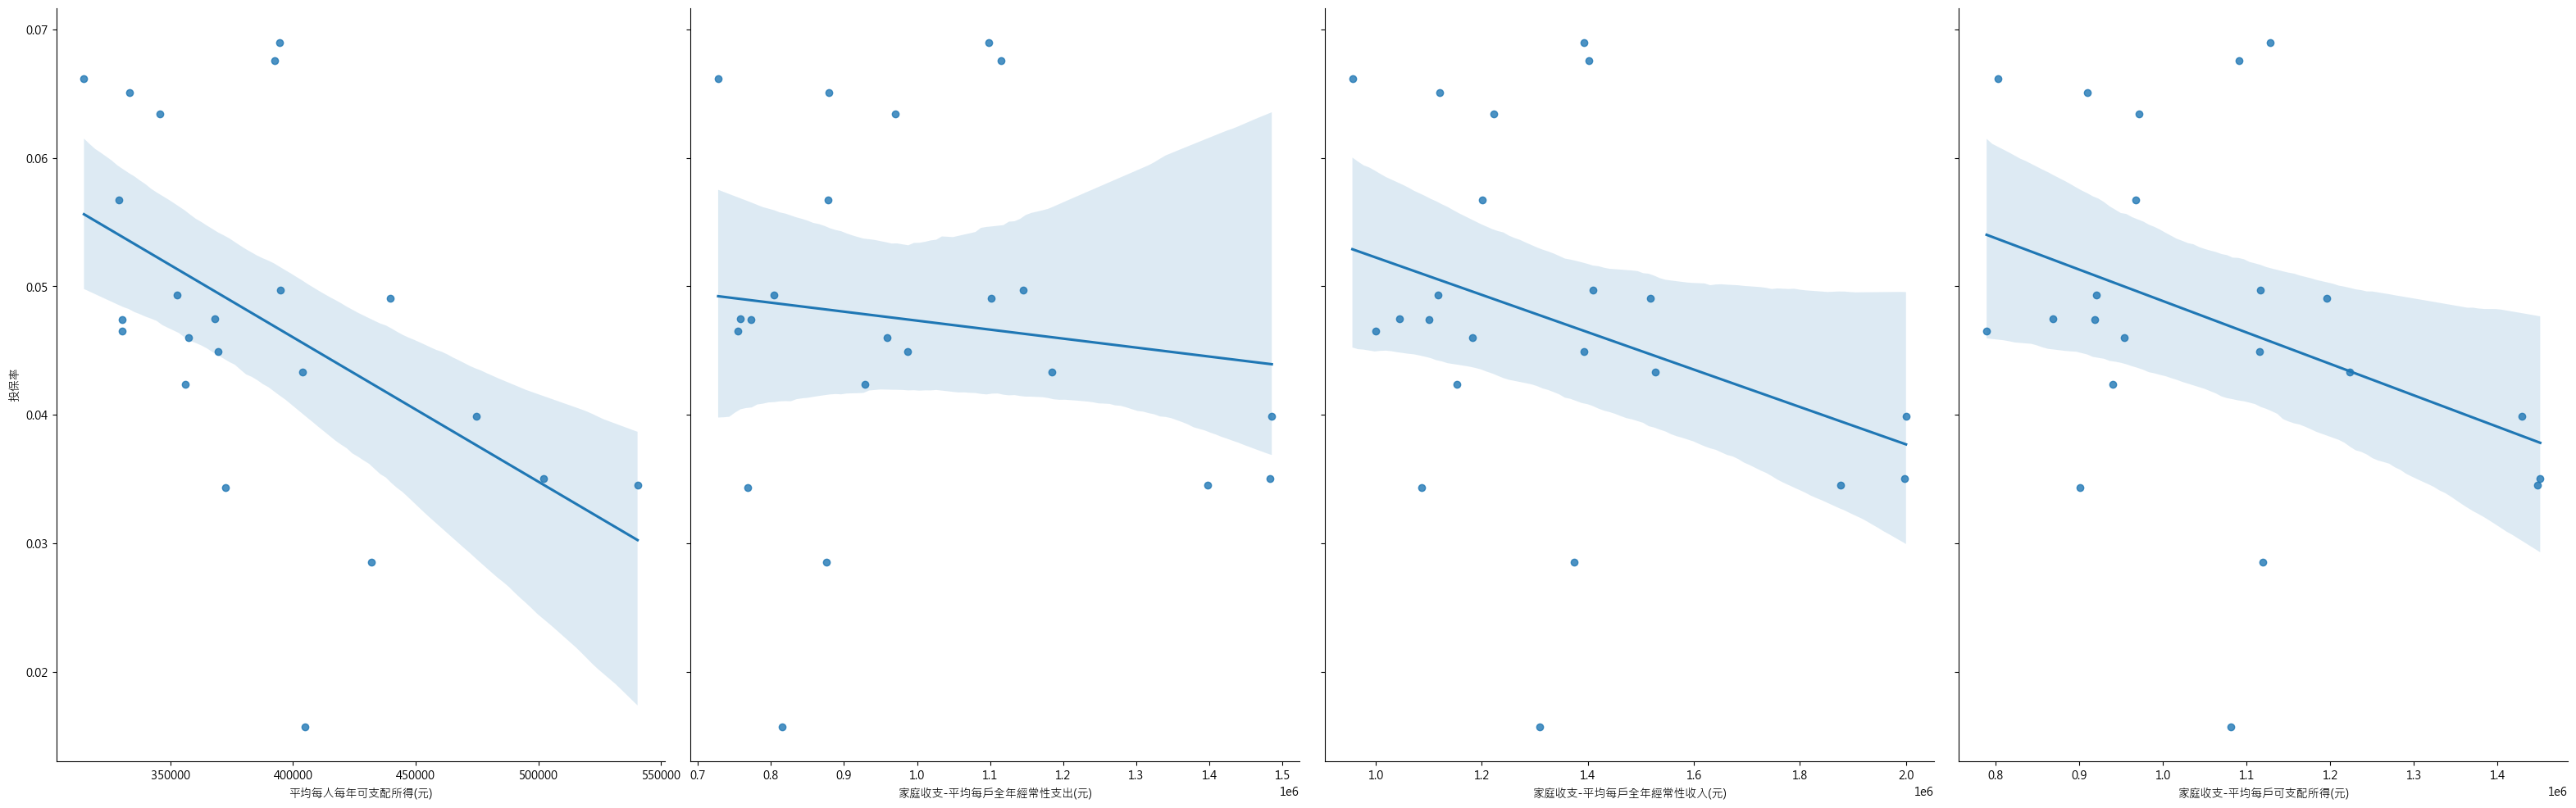

In [7]:
sns.pairplot(data, x_vars=data.columns[8:12], y_vars=data.columns[-1], height=10, aspect=0.8, kind='reg') 
plt.show()

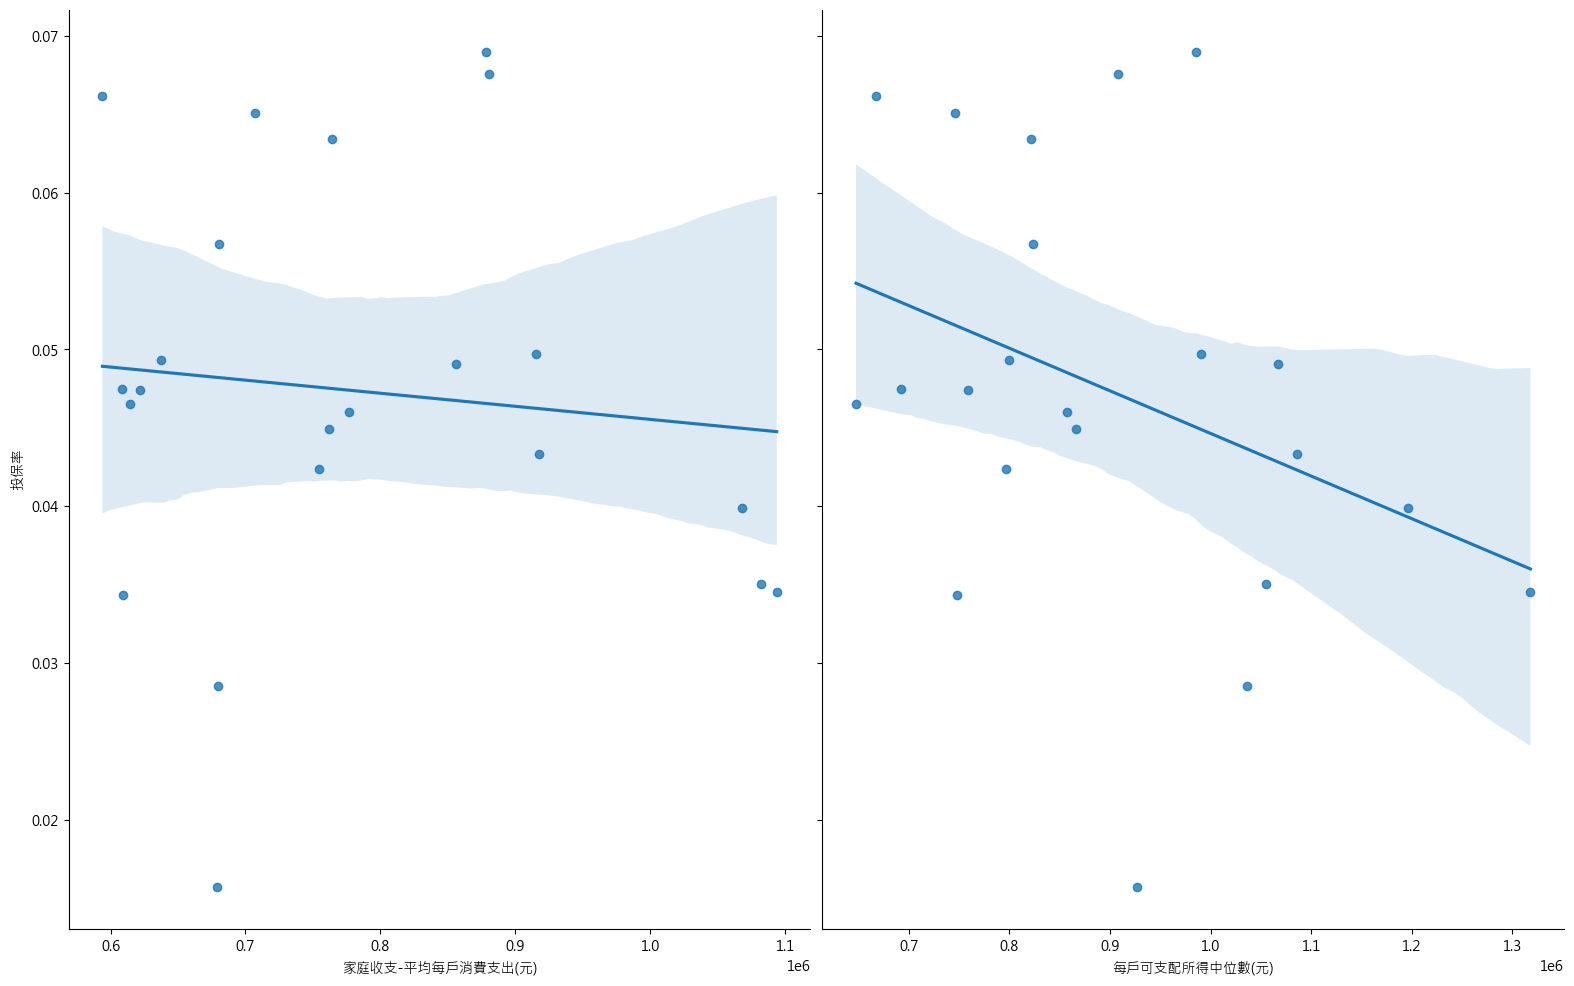

In [8]:
sns.pairplot(data, x_vars=data.columns[12:-1], y_vars=data.columns[-1], height=10, aspect=0.8, kind='reg') 
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_n = scaler.fit_transform(data)
data_norm = pd.DataFrame(data_n,index = data.index,columns = data.columns)
data_norm

,郵局間數,保險公司間數,郵局+保險公司間數,男性人口比例,女性人口比例,幼年人口比例,青壯年人口比例,老年人口比例,平均每人每年可支配所得(元),家庭收支-平均每戶全年經常性支出(元),家庭收支-平均每戶全年經常性收入(元),家庭收支-平均每戶可支配所得(元),家庭收支-平均每戶消費支出(元),每戶可支配所得中位數(元),投保率
縣市名稱,,,,,,,,,,,,,,,
新北市,2.145384,0.768537,1.089783,-1.193033,1.193033,-0.119694,0.303796,-0.147315,0.891643,0.466018,0.621840,0.704187,0.479669,0.974853,0.131145
台北市,1.941327,3.079062,2.886563,-2.403265,2.403265,0.518282,-2.537125,1.610303,2.633910,1.770406,1.839727,2.022012,1.999656,2.437222,-0.971573
桃園市,0.716983,0.353098,0.440945,-0.610800,0.610800,1.219613,0.658564,-1.487086,0.271061,0.834854,0.650100,0.848401,0.872823,1.084743,-0.306921
台中市,1.165909,1.770144,1.670560,-0.974366,0.974366,0.987639,0.512205,-1.187444,0.113663,0.659521,0.253462,0.292103,0.859615,0.530179,0.176462
台南市,0.941446,0.700245,0.767633,-0.320569,0.320569,0.004169,-0.144915,0.112057,-0.735543,-0.109770,-0.382034,-0.469561,-0.107426,-0.453970,1.211205
高雄市,2.043356,1.673398,1.788531,-0.858349,0.858349,-0.123034,-0.200850,0.257007,0.074823,0.529428,0.225698,0.156423,0.637161,0.050211,1.528426
宜蘭縣,-0.466549,-0.563145,-0.552729,0.134992,-0.134992,-0.040109,-0.296020,0.267291,-0.552592,-0.291126,-0.622405,-0.630624,-0.170618,-0.599983,-0.374897
新竹縣,-0.588984,-0.221688,-0.307713,0.801750,-0.801750,2.138409,0.509889,-2.094135,1.499992,2.157051,2.261029,1.922988,1.836618,1.730395,-0.563718
苗栗縣,-0.446143,-0.568836,-0.552729,1.224003,-1.224003,0.062987,-0.180913,0.094274,-0.325680,-0.033082,0.192116,0.283218,-0.123209,-0.192773,-0.186075


In [10]:
x = data_norm.iloc[:,:-1]
y = data_norm.iloc[:,-1]

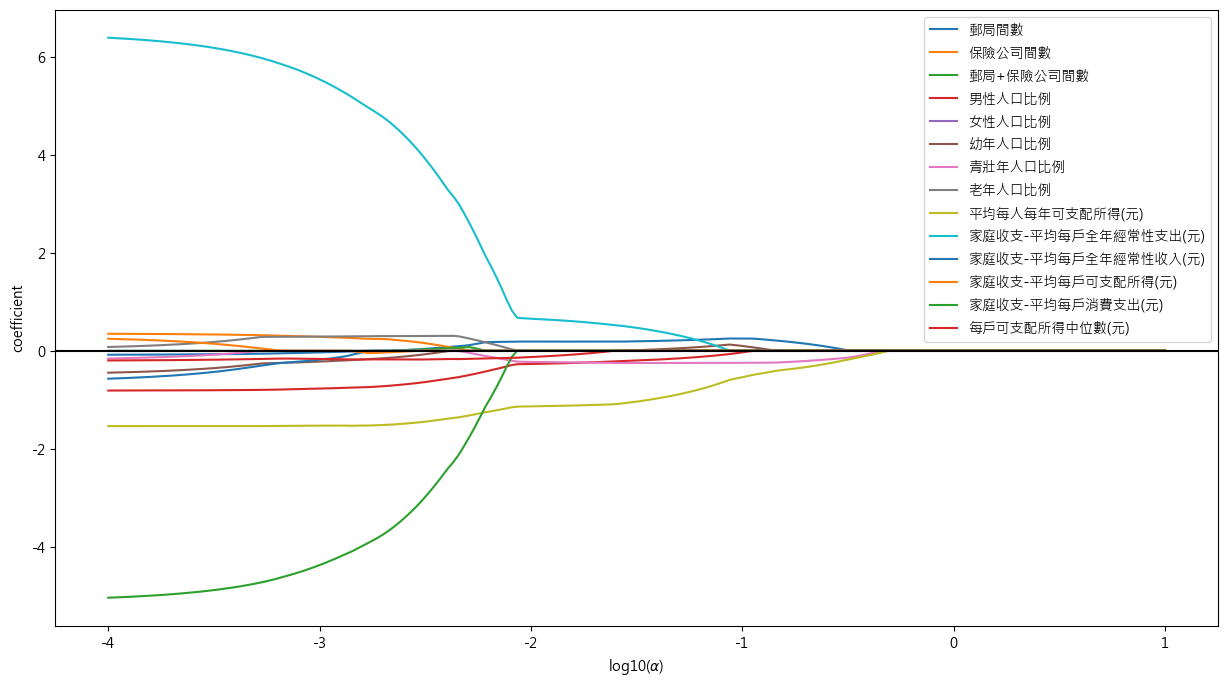

In [11]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
alphas = [10**i for i in np.linspace(-4,1,200)]
coefs = []
for a in alphas:
    reg = Lasso(alpha = a)
    reg.fit(x,y)
    coefs.append(reg.coef_)
loga = np.log10(alphas)
plt.figure(figsize=(15,8))
plt.plot(loga,coefs)
plt.axhline(y = 0,c = 'black')
plt.xlabel(r'log10($\alpha$)')
plt.ylabel('coefficient')
plt.legend(data.drop('投保率',axis=1).columns)
plt.show()

alpha =  0.02470195240327526
coef =  [ 0.18620677  0.          0.          0.          0.21638214  0.
 -0.2500776   0.         -1.09256796  0.52398709  0.          0.
  0.          0.        ]
BIC =  52.827366011116794
score =  0.7089251749166416


Text(0, 0.5, 'BIC')

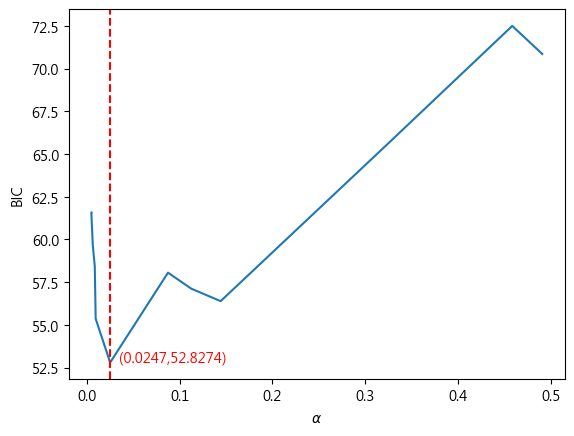

In [14]:
from sklearn.linear_model import LassoLarsIC
reg = LassoLarsIC(criterion='bic')
reg.fit(x,y)
print('alpha = ',reg.alpha_)
print('coef = ',reg.coef_)
print('BIC = ',reg.criterion_.min())
print('score = ',reg.score(x,y))
plt.plot(reg.alphas_,reg.criterion_)
idx = np.where(reg.criterion_ == reg.criterion_.min())[0]
alpha_min = reg.alphas_[idx][0]
BIC_min = reg.criterion_.min()
plt.axvline(alpha_min,color='r',ls='--')
plt.text(alpha_min+0.01,BIC_min,'(%.4f,%.4f)'%(alpha_min,BIC_min),c='r')
plt.xlabel(r'$\alpha$')
plt.ylabel('BIC')